In [25]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read in Data
sheet = "Data set 3"
df = pd.read_excel(r'/Users/kjone332/Downloads/triazole ph relaxivity curve_UPDATED2.0.xlsx', 
                   sheet_name=sheet)
df.sort_values('pH', inplace=True, ignore_index=True)
df.columns = ['pH', 'data']
df

,pH,data
0,6.46,5.543473
1,6.70,4.796023
2,6.88,4.197331
3,7.14,3.415282
4,7.35,2.952466
5,7.53,2.565204
6,7.73,1.764317
7,7.89,1.762315
8,8.13,1.682777
9,8.26,1.686997


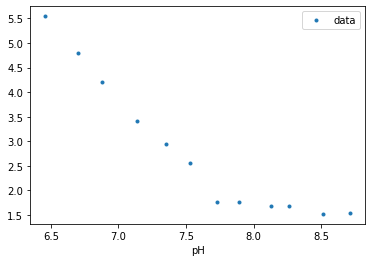

In [26]:
# Plot of Data
ax = df.plot(
    x="pH", y="data",
    kind="line",
    linestyle="", marker="."
)

In [27]:
# Define equation to use for fitting - fitting for pH
def f_model(r1, pKa, ra, rb):
    return (pKa + np.log10((r1-rb)/(ra-r1)))

# Define initial guesses
pKa_ig = 6.9
ra_ig = np.min(df["data"]) - .01
rb_ig = np.max(df["data"]) + .01

In [28]:
# Create initial parameters
df["pH_guess"] = f_model(df["data"], 
                         pKa_ig, 
                         ra_ig, 
                         rb_ig)
df

,pH,data,pH_guess
0,6.46,5.543473,4.294644
1,6.70,4.796023,6.263080
2,6.88,4.197331,6.603469
3,7.14,3.415282,6.950771
4,7.35,2.952466,7.156939
5,7.53,2.565204,7.353319
6,7.73,1.764317,8.078318
7,7.89,1.762315,8.082020
8,8.13,1.682777,8.257905
9,8.26,1.686997,8.246768


<ipython-input-27-75ca47e49ca6>:3: RuntimeWarning: invalid value encountered in log10
  return (pKa + np.log10((r1-rb)/(ra-r1)))


Text(0.05, 0.3, '$\\mathrm{pKa}=6.900$\n$\\mathrm{rA}=1.513$\n$\\mathrm{rB}=5.553$')

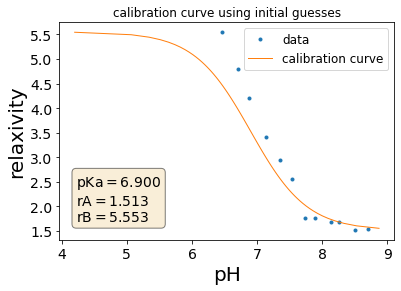

In [29]:
# First Estimation of model
ax = df.plot(
             x="pH", y="data", title="calibration curve using initial guesses",
             kind="line",
             linestyle="", marker="."
)

# Add fitted x and y values for plotting purposes
input_vals = np.linspace(1,6,100)
fitted_vals = f_model(input_vals, 
                      pKa_ig, 
                      ra_ig, 
                      rb_ig)
fitted_df = pd.DataFrame({'calibration curve': input_vals,
                          'outputs': fitted_vals})
fitted_df.sort_values('outputs', inplace=True, ignore_index=True)
fitted_df
ax = fitted_df.plot(
             x='outputs', y='calibration curve',
             kind="line", ax=ax, linewidth=1
)
plt.xlabel('pH', fontsize=20)
plt.ylabel('relaxivity', fontsize=20)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
plt.legend(loc=1, prop={'size': 12})

# Add text box
textstr = '\n'.join((
                     r'$\mathrm{pKa}=%.3f$' % (pKa_ig, ),
                     r'$\mathrm{rA}=%.3f$' % (ra_ig, ),
                     r'$\mathrm{rB}=%.3f$' % (rb_ig, )))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(0.05, 0.30, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

In [30]:
# Fit
from scipy.optimize import curve_fit

popt, pcov = curve_fit(
    f=f_model,       # model function
    xdata=df["data"],   # x data
    ydata=df["pH"],   # y data
    p0=(pKa_ig, 
        ra_ig, 
        rb_ig)      # initial value of the parameters
)
pKa_fit, ra_fit, rb_fit = popt
round_digits = 4
print('Fitted pKa: ' + str(np.round(pKa_fit,round_digits)))
print('Fitted ra: ' + str(np.round(ra_fit,round_digits)))
print('Fitted rb: ' + str(np.round(rb_fit,round_digits)))

Fitted pKa: 6.7592
Fitted ra: 1.435
Fitted rb: 7.7579


In [31]:
# Add fitted x and y values for plotting purposes
input_vals = np.linspace(1,6,100)
fitted_vals = f_model(input_vals, 
                      pKa_fit, 
                      ra_fit, 
                      rb_fit)
fitted_df = pd.DataFrame({'calibration curve': input_vals,
                          'outputs': fitted_vals})
fitted_df.dropna(inplace=True)
fitted_df.sort_values('outputs', inplace=True, ignore_index=True)
fitted_df

<ipython-input-27-75ca47e49ca6>:3: RuntimeWarning: invalid value encountered in log10
  return (pKa + np.log10((r1-rb)/(ra-r1)))


,calibration curve,outputs
0,6.000000,6.344717
1,5.949495,6.361850
2,5.898990,6.378699
3,5.848485,6.395283
4,5.797980,6.411620
...,...,...
86,1.656566,8.199054
87,1.606061,8.314974
88,1.555556,8.470466
89,1.505051,8.709710


Text(0.05, 0.3, '$\\mathrm{pKa}=6.759$\n$\\mathrm{rA}=1.435$\n$\\mathrm{rB}=7.758$')

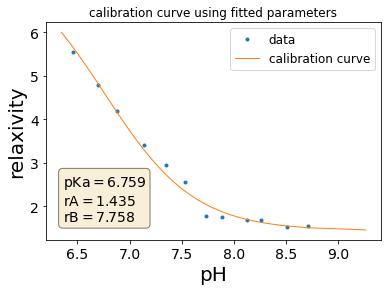

In [32]:
# Plot fitted values
ax = df.plot(
             x="pH", y="data", title="calibration curve using fitted parameters",
             kind="line",
             linestyle="", marker="."
)

ax = fitted_df.plot(
             x='outputs', y='calibration curve',
             kind="line", ax=ax, linewidth=1
)
plt.xlabel('pH', fontsize=20)
plt.ylabel('relaxivity', fontsize=20)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
plt.legend(loc=1, prop={'size': 12})

# Add text box
textstr = '\n'.join((
                     r'$\mathrm{pKa}=%.3f$' % (pKa_fit, ),
                     r'$\mathrm{rA}=%.3f$' % (ra_fit, ),
                     r'$\mathrm{rB}=%.3f$' % (rb_fit, )))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(0.05, 0.30, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

In [33]:
# Create dataframe for residual plot

# Computing residuals
input_vals = df['data']
df['fitted_ph'] = f_model(input_vals, 
                          pKa_fit, 
                          ra_fit, 
                          rb_fit)
df['residuals'] = df['pH'] - df['fitted_ph']
df.drop(columns = 'pH_guess', inplace=True)

# Save df as csv
df.columns = ['pH', 'relaxivity', 'fitted pH', 'residuals']
df.to_csv('fitted_results_'+sheet+'.csv', index=False)

# Add data for reference line
df['reference line'] = 0
df

,pH,relaxivity,fitted pH,residuals,reference line
0,6.46,5.543473,6.490746,-0.030746,0
1,6.70,4.796023,6.704262,-0.004262,0
2,6.88,4.197331,6.869411,0.010589,0
3,7.14,3.415282,7.100191,0.039809,0
4,7.35,2.952466,7.259779,0.090221,0
5,7.53,2.565204,7.421400,0.108600,0
6,7.73,1.764317,8.019217,-0.289217,0
7,7.89,1.762315,8.022010,-0.132010,0
8,8.13,1.682777,8.148629,-0.018629,0
9,8.26,1.686997,8.140993,0.119007,0


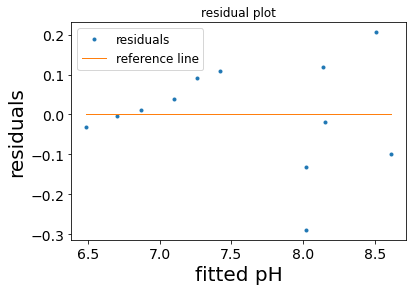

In [34]:
# Residual plot
ax = df.plot(
             x='fitted pH', y='residuals', title="residual plot",
             kind="line",
             linestyle="", marker="."
)

ax = df.plot(
             x='fitted pH', y='reference line',
             kind="line", ax=ax, linewidth=1
)
plt.xlabel('fitted pH', fontsize=20)
plt.ylabel('residuals', fontsize=20)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
plt.legend(loc=2, prop={'size': 12})